<a href="https://colab.research.google.com/github/jhar2/NeuronAI/blob/main/Predictive_Healthcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading the dataset

In [9]:
! pip install kaggle

In [10]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [11]:
! cp kaggle.json ~/.kaggle/

In [12]:
! chmod 600 ~/.kaggle/kaggle.json

In [13]:
! kaggle datasets download kaushil268/disease-prediction-using-machine-learning

  0% 0.00/29.8k [00:00<?, ?B/s]
100% 29.8k/29.8k [00:00<00:00, 21.8MB/s]


In [14]:
!unzip disease-prediction-using-machine-learning.zip

Archive:  disease-prediction-using-machine-learning.zip
  inflating: Testing.csv             
  inflating: Training.csv            


# Pre-processing of data and Visualization

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

In [16]:
dftest = pd.read_csv('/content/Testing.csv')
dftrain = pd.read_csv('/content/Training.csv')

# show first 5 records of training dataset
dftrain.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [17]:
dftest.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [18]:
dftrain.shape

(4920, 134)

In [19]:
dftest.shape

(42, 133)

In [20]:
print(dftrain.columns)
print(len(dftrain.columns))

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',
       'Unnamed: 133'],
      dtype='object', length=134)
134


In [21]:
dftrain.isnull().any()

itching                 False
skin_rash               False
nodal_skin_eruptions    False
continuous_sneezing     False
shivering               False
                        ...  
blister                 False
red_sore_around_nose    False
yellow_crust_ooze       False
prognosis               False
Unnamed: 133             True
Length: 134, dtype: bool

In [22]:
dftrain.drop('Unnamed: 133', axis=1, inplace=True)

In [23]:
dftrain.isnull().any()

itching                 False
skin_rash               False
nodal_skin_eruptions    False
continuous_sneezing     False
shivering               False
                        ...  
inflammatory_nails      False
blister                 False
red_sore_around_nose    False
yellow_crust_ooze       False
prognosis               False
Length: 133, dtype: bool

In [24]:
dftrain.prognosis.unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [25]:
from collections import Counter
Counter(dftrain['prognosis']).items()

dict_items([('Fungal infection', 120), ('Allergy', 120), ('GERD', 120), ('Chronic cholestasis', 120), ('Drug Reaction', 120), ('Peptic ulcer diseae', 120), ('AIDS', 120), ('Diabetes ', 120), ('Gastroenteritis', 120), ('Bronchial Asthma', 120), ('Hypertension ', 120), ('Migraine', 120), ('Cervical spondylosis', 120), ('Paralysis (brain hemorrhage)', 120), ('Jaundice', 120), ('Malaria', 120), ('Chicken pox', 120), ('Dengue', 120), ('Typhoid', 120), ('hepatitis A', 120), ('Hepatitis B', 120), ('Hepatitis C', 120), ('Hepatitis D', 120), ('Hepatitis E', 120), ('Alcoholic hepatitis', 120), ('Tuberculosis', 120), ('Common Cold', 120), ('Pneumonia', 120), ('Dimorphic hemmorhoids(piles)', 120), ('Heart attack', 120), ('Varicose veins', 120), ('Hypothyroidism', 120), ('Hyperthyroidism', 120), ('Hypoglycemia', 120), ('Osteoarthristis', 120), ('Arthritis', 120), ('(vertigo) Paroymsal  Positional Vertigo', 120), ('Acne', 120), ('Urinary tract infection', 120), ('Psoriasis', 120), ('Impetigo', 120)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


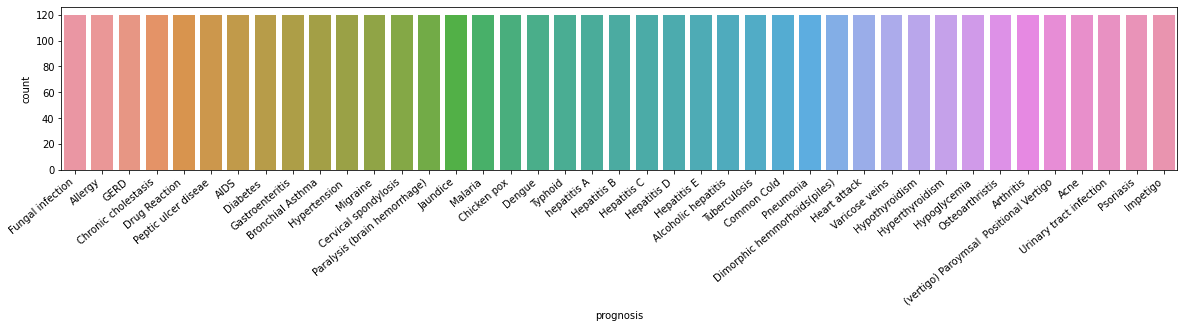

In [26]:
import seaborn as sns
# count of each target class label
plt.figure(figsize = (20, 3))
ax = sns.countplot(dftrain['prognosis'])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.show()

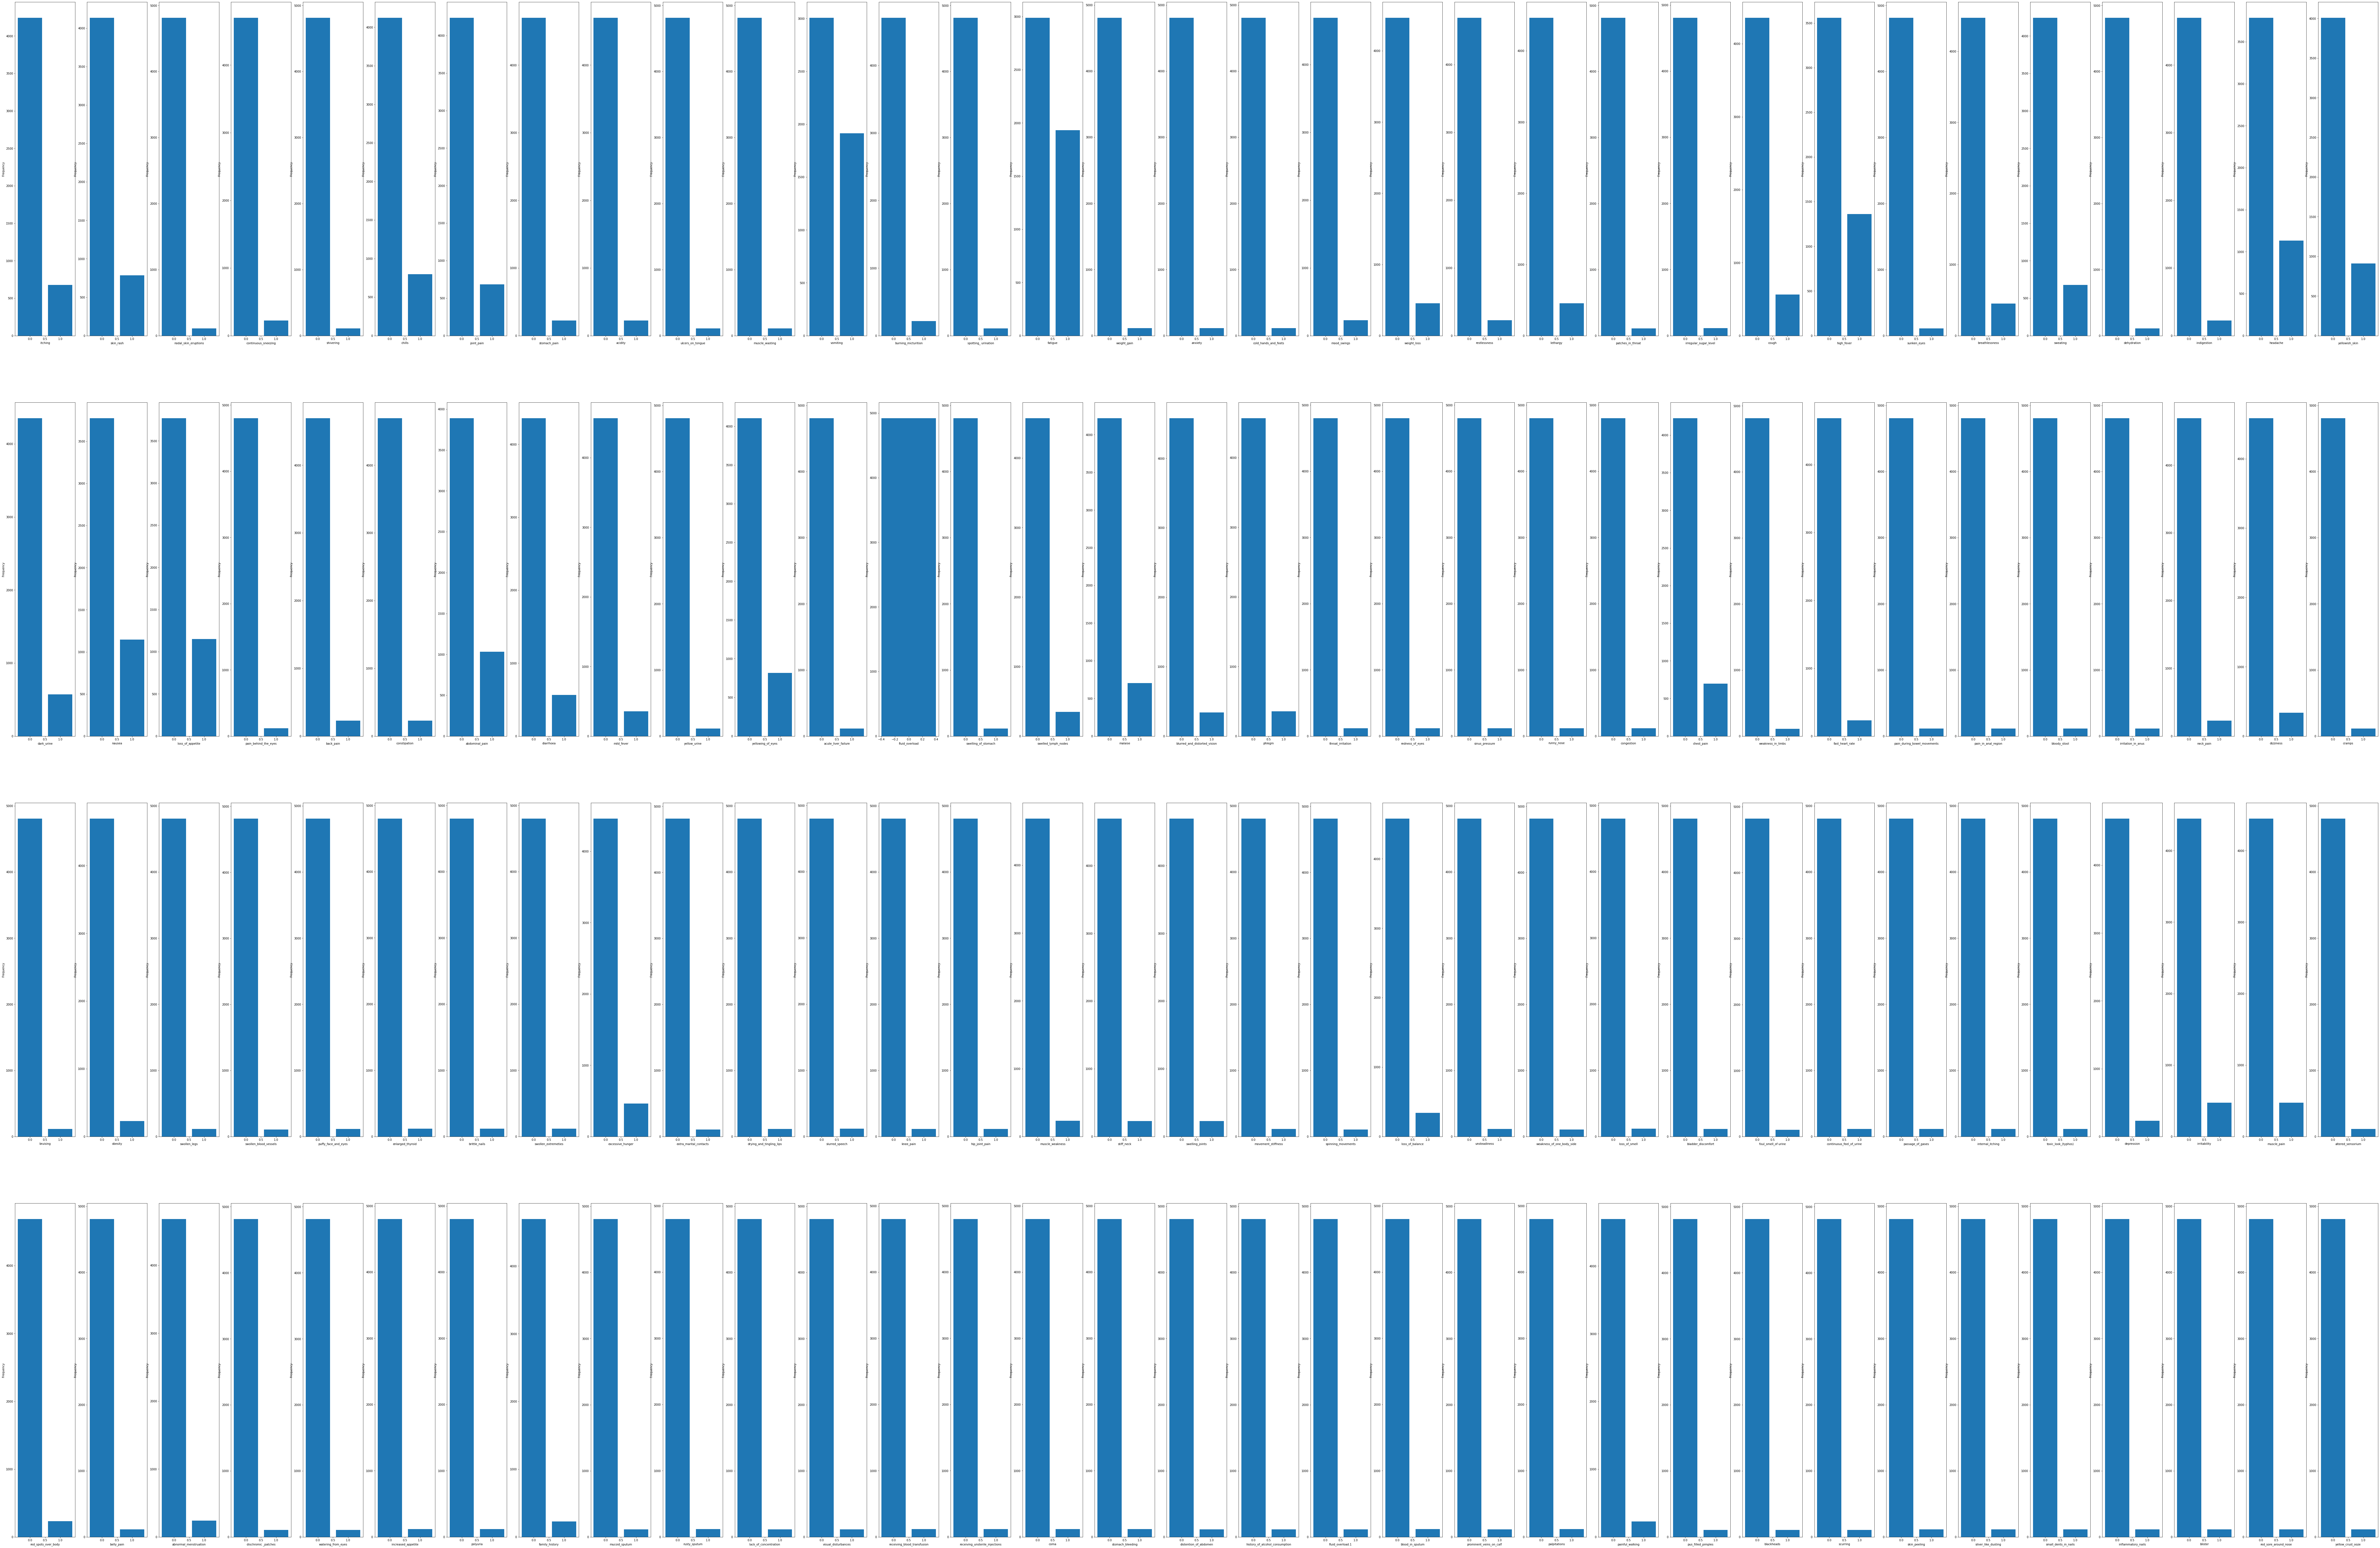

In [27]:
features = dftrain.columns[:-1]
plt.figure(figsize = (150,100))
for i, feature in enumerate(features):
    plt.subplot(4,33,i+1)
    plt.bar(dftrain[feature].value_counts().index.to_numpy(), dftrain[feature].value_counts().values)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
plt.show()

In [28]:
dftrain.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
dftest.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,...,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,0.166667,0.190476,0.023810,0.047619,0.023810,0.166667,0.142857,0.047619,0.047619,0.023810,...,0.023810,0.023810,0.023810,0.047619,0.023810,0.023810,0.023810,0.023810,0.047619,0.023810
std,0.377195,0.397437,0.154303,0.215540,0.154303,0.377195,0.354169,0.215540,0.215540,0.154303,...,0.154303,0.154303,0.154303,0.215540,0.154303,0.154303,0.154303,0.154303,0.215540,0.154303
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Feature Selection method 1:

Univariate selection: Using SelectKBest and ChiSquare

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [31]:
xtrain = dftrain.iloc[:,:-1]
ytrain = dftrain.iloc[:,-1]

Choosing the best 50 and 10 features in each of the cells below

In [32]:
selected_features = SelectKBest(score_func=chi2, k=50)
fit = selected_features.fit(xtrain,ytrain)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(xtrain.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(50,'Score'))

                              Specs        Score
36             pain_behind_the_eyes  4800.000000
51                throat_irritation  4800.000000
52                  redness_of_eyes  4800.000000
53                   sinus_pressure  4800.000000
54                       runny_nose  4800.000000
55                       congestion  4800.000000
88                    loss_of_smell  4800.000000
104              increased_appetite  4800.000000
105                        polyuria  4800.000000
111     receiving_blood_transfusion  4800.000000
112  receiving_unsterile_injections  4800.000000
71                 enlarged_thyroid  4800.000000
72                    brittle_nails  4800.000000
73              swollen_extremeties  4800.000000
77                   slurred_speech  4800.000000
113                            coma  4800.000000
114                stomach_bleeding  4800.000000
120                    palpitations  4800.000000
108                    rusty_sputum  4800.000000
118                 

In [33]:
selected_features = SelectKBest(score_func=chi2, k=10)
fit = selected_features.fit(xtrain,ytrain)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(xtrain.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

                           Specs   Score
36          pain_behind_the_eyes  4800.0
51             throat_irritation  4800.0
52               redness_of_eyes  4800.0
53                sinus_pressure  4800.0
54                    runny_nose  4800.0
55                    congestion  4800.0
88                 loss_of_smell  4800.0
104           increased_appetite  4800.0
105                     polyuria  4800.0
111  receiving_blood_transfusion  4800.0


Feature Selection method 2: 

Feature importance using Tree Based Classifiers - Top 20 feaures 



[0.01563072 0.0066951  0.00798005 0.00526976 0.00561035 0.0127012
 0.01094317 0.01043639 0.00529732 0.00508102 0.0047911  0.01509203
 0.00560457 0.00808729 0.0119673  0.00051043 0.00094489 0.00067837
 0.00124844 0.01382657 0.00257861 0.00366777 0.00653821 0.00072338
 0.0107367  0.01317293 0.00635735 0.00870865 0.01113574 0.00479907
 0.00409307 0.0102316  0.00811821 0.01312827 0.01359028 0.01013857
 0.0116515  0.00825798 0.00318029 0.01153366 0.01526995 0.01450197
 0.00188196 0.01485388 0.00220455 0.         0.0059388  0.00597518
 0.01028507 0.0039588  0.00824993 0.00527368 0.00274999 0.00374994
 0.00327192 0.0037511  0.01534782 0.00368725 0.00798463 0.00615313
 0.00681343 0.00513899 0.00546337 0.00891216 0.00707747 0.00555039
 0.00594444 0.0039216  0.00502164 0.00020467 0.00136292 0.00527047
 0.00627854 0.00730974 0.00567907 0.00641416 0.00073897 0.01032855
 0.00940058 0.00770612 0.01057565 0.00554384 0.00355794 0.00956189
 0.00241396 0.00764941 0.01382449 0.0044876  0.00349254 0.01142

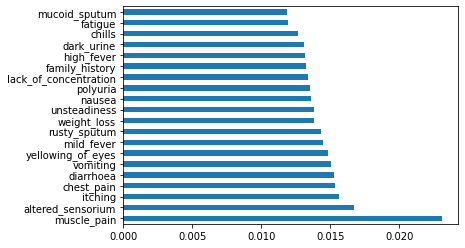

In [34]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(xtrain,ytrain)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=xtrain.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

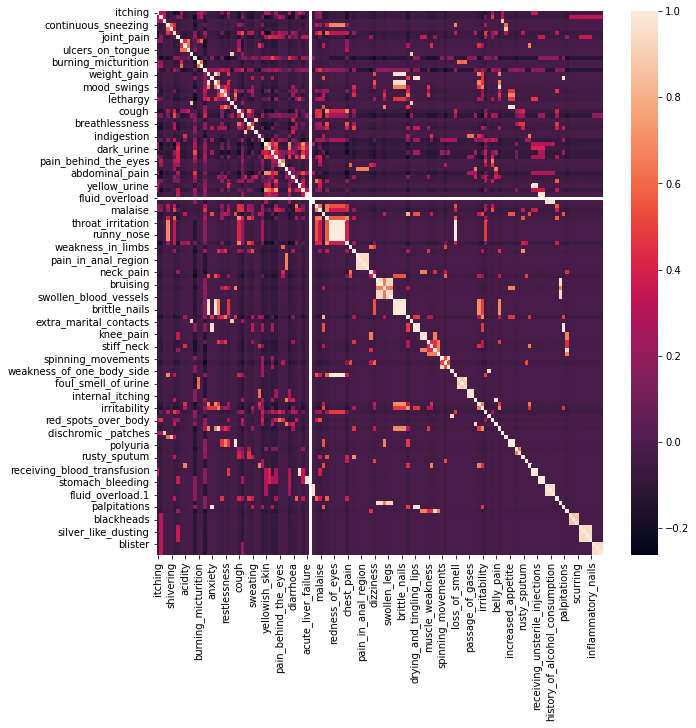

In [35]:
plt.figure(figsize = (10, 10))
sns.heatmap(dftrain.corr(), annot = False)
plt.show()

# Machine Learning Models

### Model 1 - Decision Tree Classifier

In [36]:
from sklearn.model_selection import train_test_split
#from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#import math

# split dataset into attributes and labels
X_train = dftrain.iloc[:, :-1].values # the training attributes
y_train = dftrain.iloc[:, 132].values # the training labels
X_test = dftest.iloc[:, :-1].values # the testing attributes
y_test = dftest.iloc[:, 132].values # the testing labels 

In [37]:
model_dt = DecisionTreeClassifier(splitter='best', criterion='entropy', min_samples_leaf=2, random_state = 22)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2, random_state=22)

In [38]:
y_pred_dt = model_dt.predict(X_test)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# using accuracy performance metric
dt_acc_train = accuracy_score(y_train, model_dt.predict(X_train))
dt_acc_test = accuracy_score(y_test, y_pred_dt)
print("Train Accuracy: ", dt_acc_train)
print("Test Accuracy: ", dt_acc_test)


[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.0

### Model 2 - Logistic Regression Classifier

In [40]:
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LogisticRegression as lr
lm = lr(C = 3000, multi_class='ovr', solver='liblinear')
lm.fit(X_train, y_train)

LogisticRegression(C=3000, multi_class='ovr', solver='liblinear')

In [41]:
y_pred_lr = lm.predict(X_test)

In [42]:
#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# using accuracy performance metric
lr_acc_train = accuracy_score(y_train, lm.predict(X_train))
lr_acc_test = accuracy_score(y_test, y_pred_lr)
print("Train Accuracy: ", dt_acc_train)
print("Test Accuracy: ", dt_acc_test)

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.0

### Model 3 - MLP Classifier

In [43]:
from sklearn.neural_network import MLPClassifier

In [44]:
mlp = MLPClassifier(hidden_layer_sizes=(3,3), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

y_pred_mlp = mlp.predict(X_test)

In [45]:
print(confusion_matrix(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))

# using accuracy performance metric
mlp_acc_train = accuracy_score(y_train, mlp.predict(X_train))
mlp_acc_test = accuracy_score(y_test, y_pred_mlp)


[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.0

In [46]:
print("Train Accuracy: ", mlp_acc_train)
print("Test Accuracy: ", mlp_acc_test)


Train Accuracy:  1.0
Test Accuracy:  0.9761904761904762


In [47]:
print(confusion_matrix(y_train,mlp.predict(X_train)))
print(classification_report(y_test,y_pred_mlp))

[[120   0   0 ...   0   0   0]
 [  0 120   0 ...   0   0   0]
 [  0   0 120 ...   0   0   0]
 ...
 [  0   0   0 ... 120   0   0]
 [  0   0   0 ...   0 120   0]
 [  0   0   0 ...   0   0 120]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00        

### Model 4 - Support Vector Machines

In [48]:
from sklearn.svm import SVC  
svm = SVC(C=2,kernel='linear') 
  
# fitting x samples and y classes
svm.fit(X_train, y_train)

SVC(C=2, kernel='linear')

In [49]:
y_pred_svm = svm.predict(X_test)

In [50]:
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# using accuracy performance metrics 
svm_acc_train = accuracy_score(y_train, svm.predict(X_train))
svm_acc_test = accuracy_score(y_test, y_pred_svm)


[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.0

In [51]:
print("Train Accuracy: ", svm_acc_train)
print("Test Accuracy: ", svm_acc_test)

Train Accuracy:  1.0
Test Accuracy:  1.0
